1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [59]:
#Delivery time prediction

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dtime = pd.read_csv("delivery_time.csv")
dtime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
#EDA

In [6]:
print(dtime.head())
print(dtime.info())
print(dtime.describe())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


In [7]:
dtime=dtime.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dtime

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
#correlation analysis
dtime.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

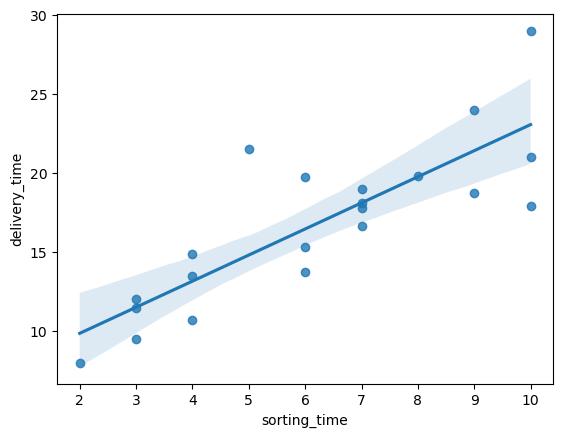

In [9]:
sns.regplot(x=dtime['sorting_time'],y=dtime['delivery_time'])

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('delivery_time~sorting_time',data=dtime).fit()

In [12]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [15]:
#Tranformations

In [16]:
dtime['sorting_time_log'] = np.log(dtime['sorting_time'])  # Log transformation
dtime['sorting_time_sqrt'] = np.sqrt(dtime['sorting_time'])  # Square root transformation
dtime['sorting_time_sq'] = dtime['sorting_time'] ** 2  # Squaring transformation
dtime['sorting_time_inv'] = 1 / dtime['sorting_time']  # Inverse transformation

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


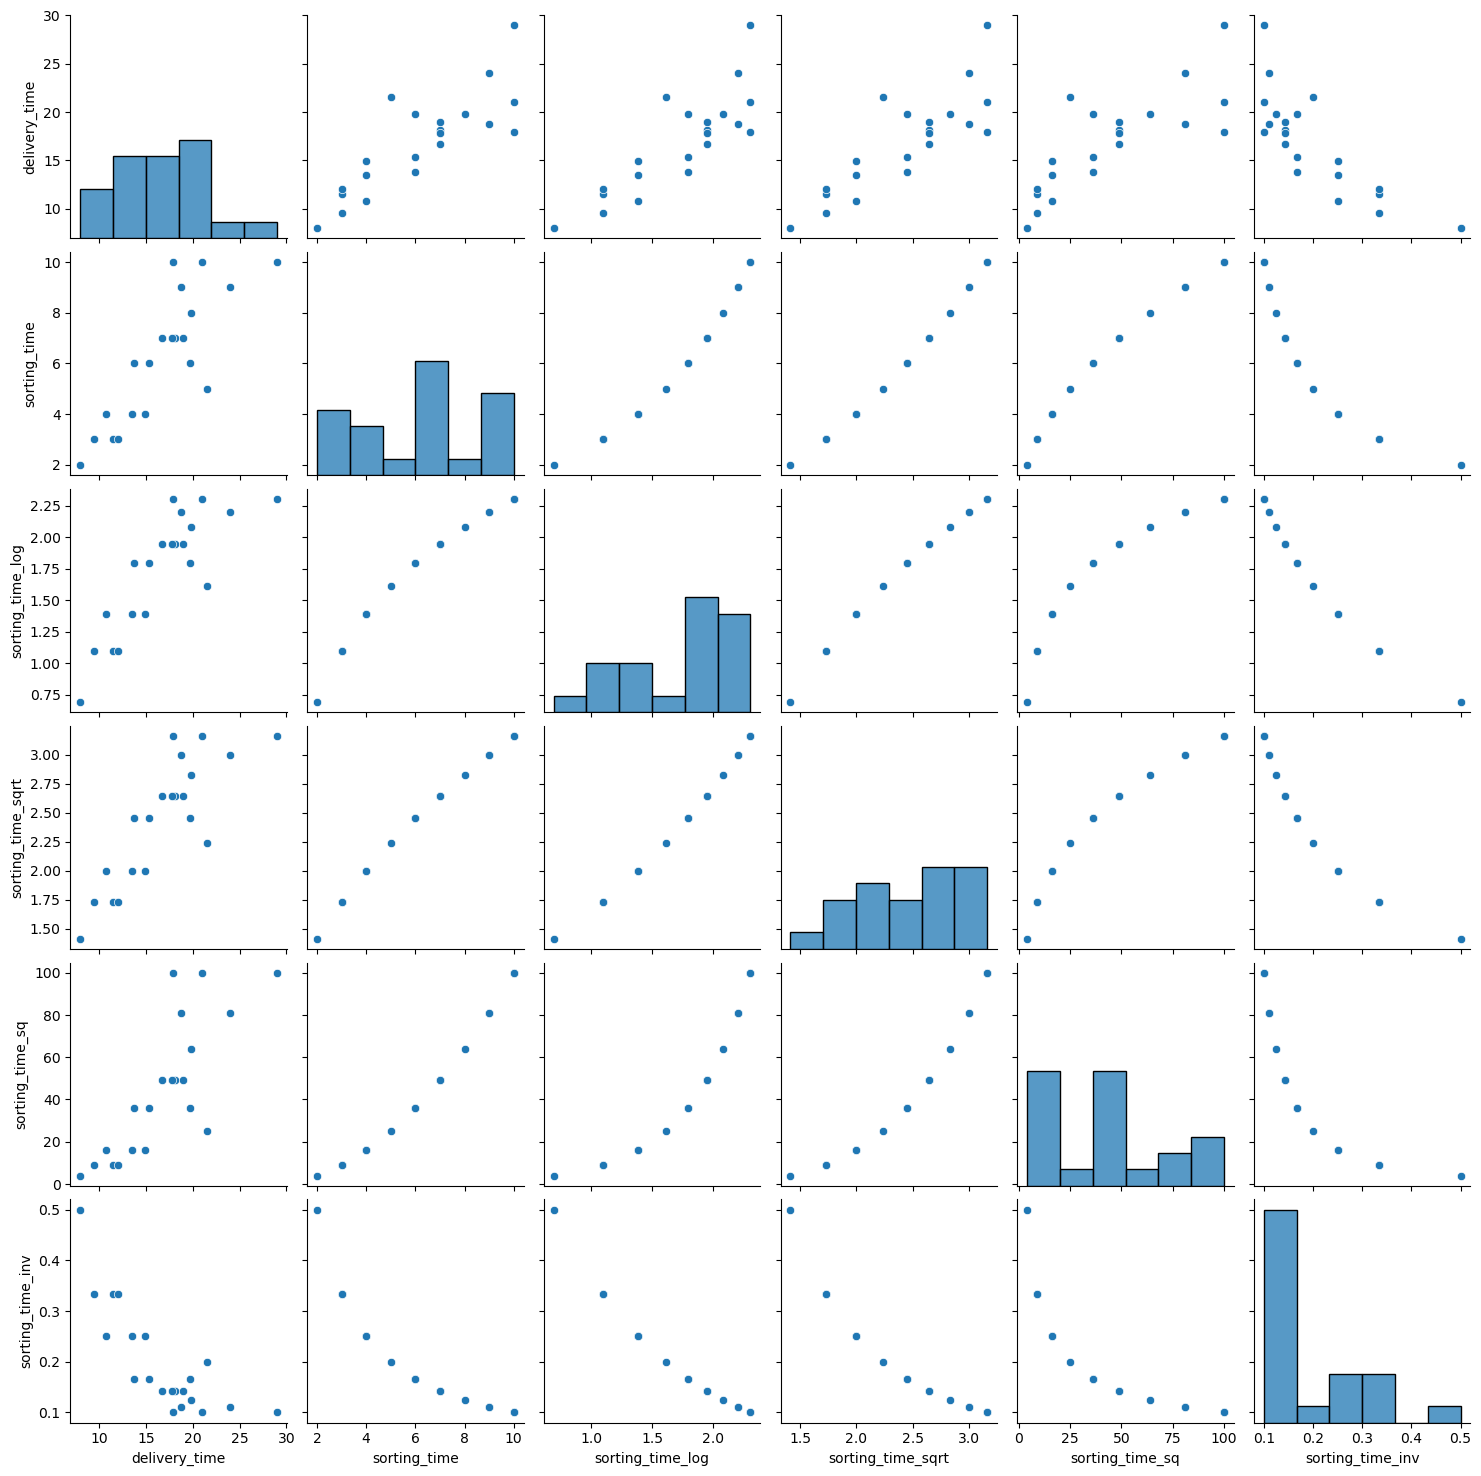

In [17]:
sns.pairplot(dtime[['delivery_time', 'sorting_time', 'sorting_time_log', 'sorting_time_sqrt', 'sorting_time_sq', 'sorting_time_inv']])

In [43]:
transformed_model = smf.ols('delivery_time~sorting_time_log', data=dtime).fit()
print(transformed_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.25e-13
Time:                        13:37:07   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5

In [44]:
transformed_model = smf.ols('delivery_time~sorting_time_sqrt', data=dtime).fit()
print(transformed_model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           8.57e-18
Time:                        13:38:06   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.606e+04 

In [45]:
transformed_model = smf.ols('delivery_time~sorting_time_sq', data=dtime).fit()
print(transformed_model_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.52e-16
Time:                        13:39:16   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.804e+04   2186

In [46]:
transformed_model = smf.ols('delivery_time~sorting_time_inv', data=dtime).fit()
print(transformed_model_inv.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.58e-07
Time:                        13:42:58   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.043e+05   5

In [47]:
# Compare the models' performances
print("R-squared (Log):", transformed_model_log.rsquared)
print("R-squared (Square Root):", transformed_model_sqrt.rsquared)
print("R-squared (Square):", transformed_model_sq.rsquared)
print("R-squared (Inverse):", transformed_model_inv.rsquared)

R-squared (Log): 0.853888882875697
R-squared (Square Root): 0.9310009544993526
R-squared (Square): 0.9153198857852564
R-squared (Inverse): 0.5885951068932687


In [49]:
#the model with the square root transformation of 'sorting_time' 
#has the highest R-squared value (0.931), 
#suggesting that it provides the best fit for predicting 'delivery_time' 


In [51]:
from sklearn.linear_model import LinearRegression

In [55]:
dtime['sorting_time_sqrt'] = np.sqrt(dtime['sorting_time'])

X = dtime[['sorting_time_sqrt']]  # Use the transformed sorting_time (square root)
y = dtime['delivery_time'] 
model = LinearRegression()
model.fit(X, y)

# Predict delivery_time for new values of sorting_time
new_sorting_time = 9  # Example new value of sorting_time
predicted_delivery_time = model.predict([[np.sqrt(new_sorting_time)]])  # Applying square root transformation
print("Predicted delivery_time for sorting_time =", new_sorting_time, ":", predicted_delivery_time)

Predicted delivery_time for sorting_time = 9 : [21.29093564]


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
#Salary Hike prediction

In [20]:
Salary = pd.read_csv("Salary_Data.csv")
print(Salary.head())
print(Salary.info())
print(Salary.describe())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [21]:
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


/var/folders/vb/tz5cff5s6j3g60jvngcxycjh0000gn/T/ipykernel_1210/1937717205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

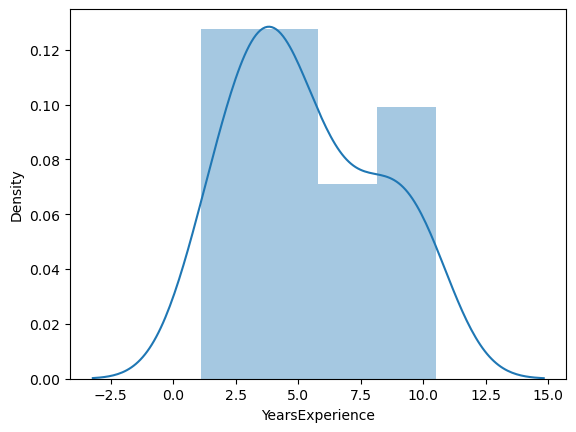

In [22]:
sns.distplot(Salary['YearsExperience'])

/var/folders/vb/tz5cff5s6j3g60jvngcxycjh0000gn/T/ipykernel_1210/4015770434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

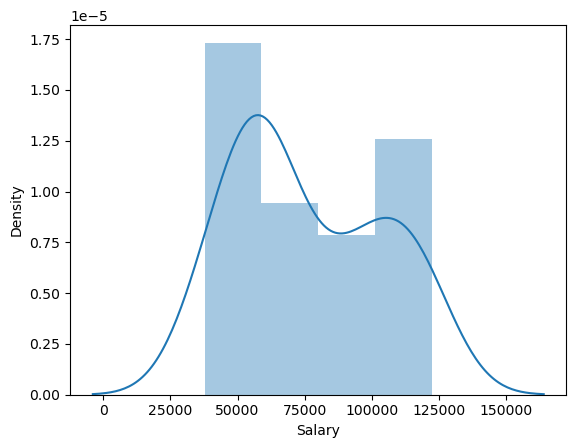

In [23]:
sns.distplot(Salary['Salary'])

In [24]:
Salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [25]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

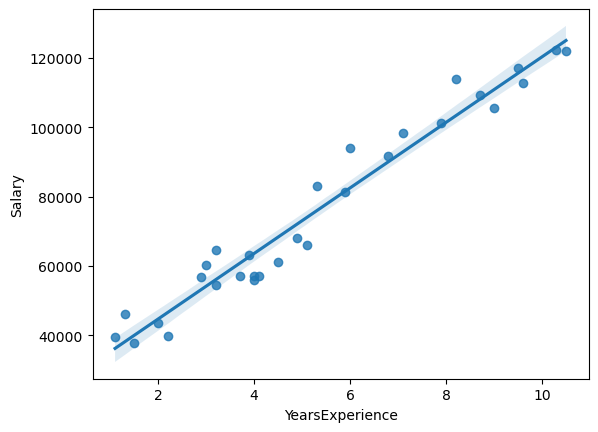

In [26]:
sns.regplot(x=Salary['YearsExperience'],y=Salary['Salary'])

In [27]:
model=smf.ols("Salary~YearsExperience",data=Salary).fit()

In [28]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [30]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [31]:
#transformations

In [32]:
Salary['YearsExperience_log'] = np.log(Salary['YearsExperience'])  # Log transformation
Salary['YearsExperience_sqrt'] = np.sqrt(Salary['YearsExperience'])  # Square root transformation
Salary['YearsExperience_sq'] = Salary['YearsExperience'] ** 2  # Squaring transformation
Salary['YearsExperience_inv'] = 1 / Salary['YearsExperience']  # Inverse transformation

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


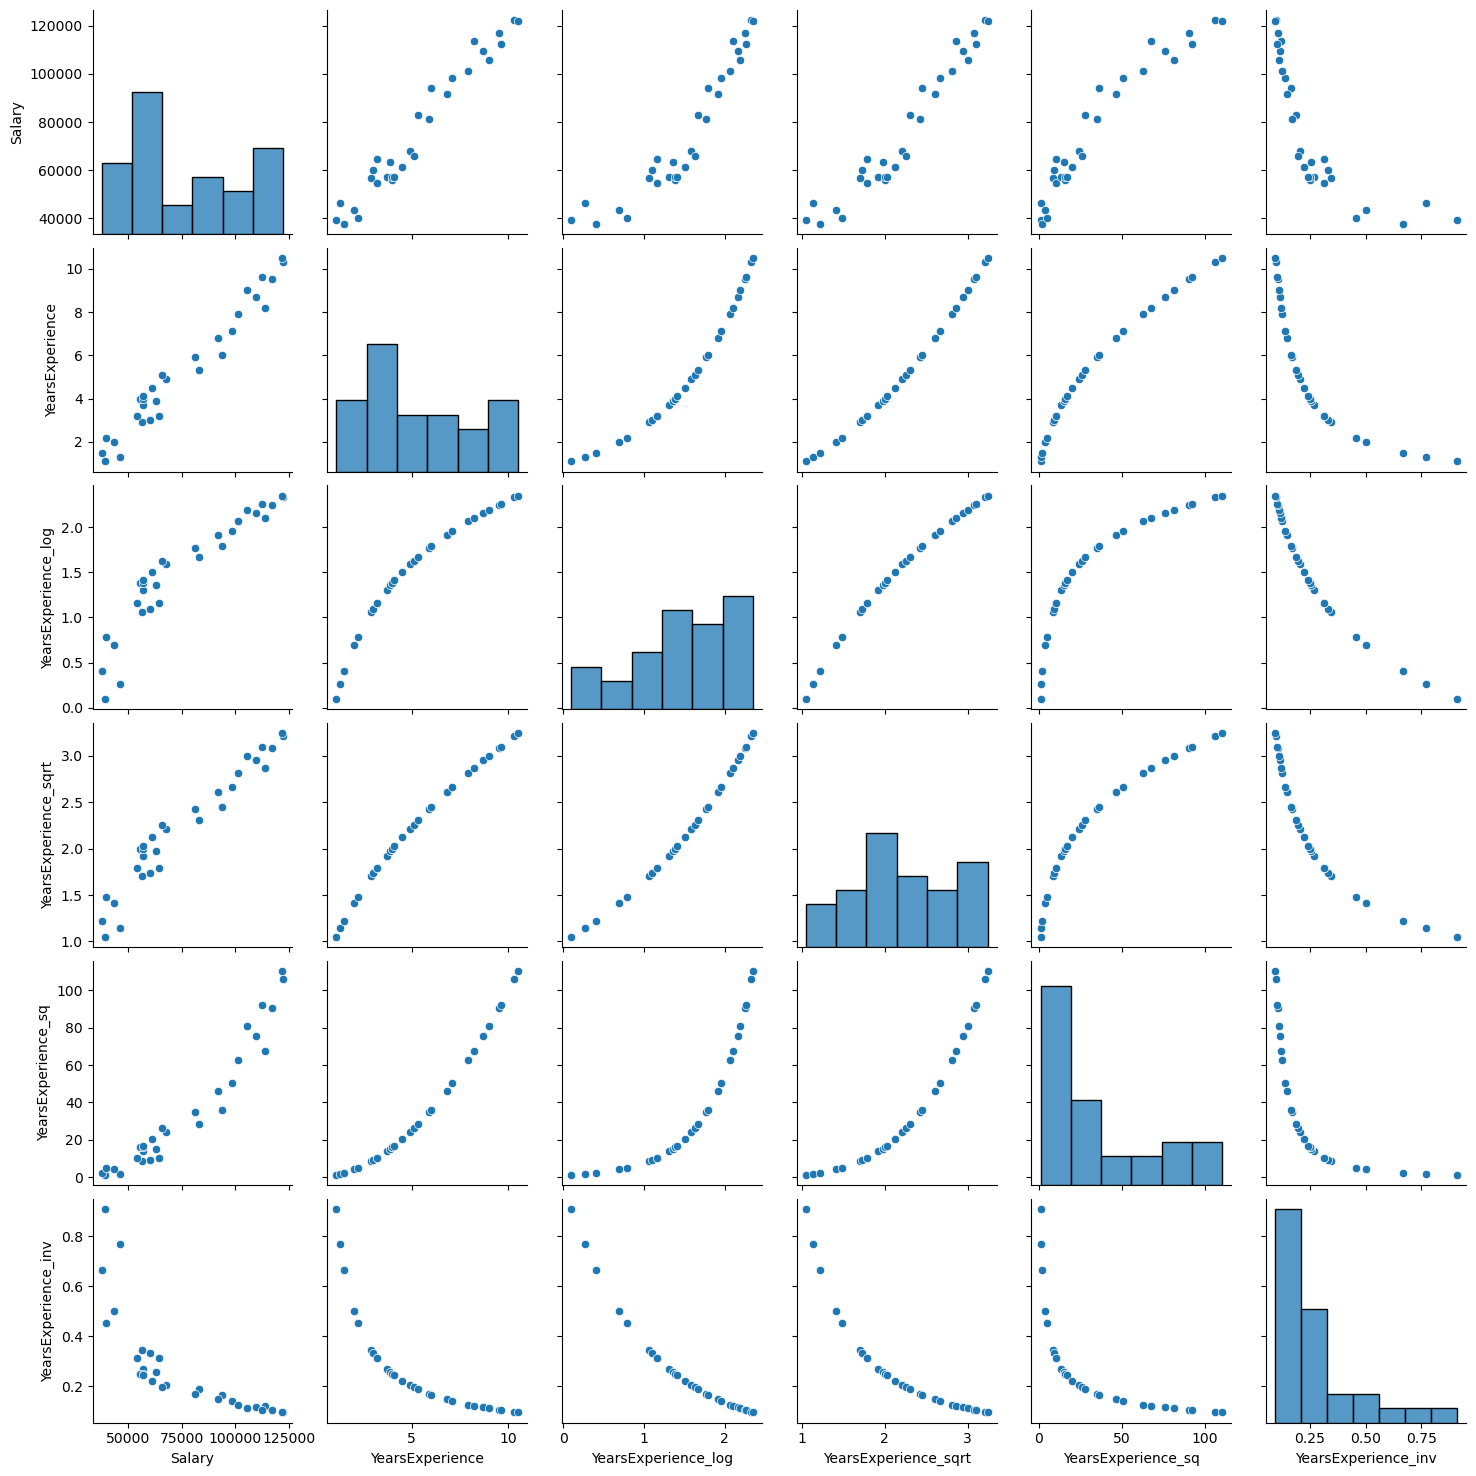

In [33]:
sns.pairplot(Salary[['Salary', 'YearsExperience', 'YearsExperience_log', 'YearsExperience_sqrt', 'YearsExperience_sq', 'YearsExperience_inv']])

In [36]:
transformed_model_log = smf.ols("Salary ~ YearsExperience_log", data=Salary).fit()
print(transformed_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.25e-13
Time:                        12:47:46   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5

In [37]:
transformed_model_sqrt = smf.ols("Salary ~ YearsExperience_sqrt", data=Salary).fit()
print(transformed_model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           8.57e-18
Time:                        12:47:58   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.606e+04 

In [38]:
transformed_model_sq = smf.ols("Salary ~ YearsExperience_sq", data=Salary).fit()
print(transformed_model_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.52e-16
Time:                        12:48:11   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.804e+04   2186

In [40]:
transformed_model_inv = smf.ols("Salary ~ YearsExperience_inv", data=Salary).fit()
print(transformed_model_inv.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.58e-07
Time:                        12:48:24   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.043e+05   5

In [41]:
# Compare the models' performances
print("R-squared (Log):", transformed_model_log.rsquared)
print("R-squared (Square Root):", transformed_model_sqrt.rsquared)
print("R-squared (Square):", transformed_model_sq.rsquared)
print("R-squared (Inverse):", transformed_model_inv.rsquared)

R-squared (Log): 0.853888882875697
R-squared (Square Root): 0.9310009544993526
R-squared (Square): 0.9153198857852564
R-squared (Inverse): 0.5885951068932687


In [42]:
#Square root transformation model has the highest R-squared value (0.931), 
#indicating that it explains the most variance in Salary among the models tested. 
#hence the best performing model 

In [57]:
# Square root transformation applied to 'YearsExperience'
Salary['YearsExperience_sqrt'] = np.sqrt(Salary['YearsExperience'])

# linear regression model using the square root transformed 'YearsExperience'
X_sqrt = Salary[['YearsExperience_sqrt']]
y = Salary['Salary']
model_sqrt = LinearRegression().fit(X_sqrt, y)

#predictions
new_years_exp = 3  # Example years of experience
predicted_salary_sqrt = model_sqrt.predict([[np.sqrt(new_years_exp)]])
print("Predicted salary for", new_years_exp, "years of experience (Square Root):", predicted_salary_sqrt[0])


Predicted salary for 3 years of experience (Square Root): 55825.51820153091


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
